# EEP 153: Project 4
## Team Normal Borlaug: A Study of Uganda VS Tanzania

This Python notebook walks through all of our deliverables, so you can run it and check out how everything works in addition to verify we have met all of our deliverables. ***Click*** on the Table of Contents to be directed to any deliverable you want to see.

However, before you run *anything* please run these installs so that everything works properly!

In [6]:
# Run these installs!
!pip install CFEDemands
!pip install gspread
!pip install gspread_pandas
!pip install oauth2client
!pip install plotly
!pip install python-gnupg
!pip install ConsumerDemands
import cfe
import pandas as pd
import numpy as np

## Table of Contents and Deliverables
1. <a href="#replicability-and-documentation"><span style="color:red;">[Deliverable 1.1[A]]</span> - Replicability and Documentation</a>
2. <a href="#document-goals"><span style="color:red;">[Deliverable 1.2[A]]</span> - Document Goals</a>
3. <a href="#unit-tests"><span style="color:red;">[Deliverable 1.3[A]]</span> - Unit Tests</a>
4. <a href="#choice-of-a-dataset"><span style="color:red;">[Deliverable 1.4[A]]</span> - Choice of a Dataset</a>
5. <a href="#estimate-demand-system"><span style="color:red;">[Deliverable 1.5[A]]</span> - Estimate Demand System</a>
6. <a href="#construct-nutrient-system"><span style="color:red;">[Deliverable 1.6[A]]</span> - Construct Nutrient System</a>
7. <a href="#nutritional-challenges-and-policy-goal"><span style="color:red;">[Deliverable 1.7[A]]</span> - Nutritional Challenges and Policy Goal</a>
8. <a href="#policy-options"><span style="color:red;">[Deliverable 1.8[B]]</span> - Policy Options</a>
9. <a href="#policy-cost"><span style="color:red;">[Deliverable 1.9[C]]</span> - Policy Cost</a>
10. <a href="#value-of-technical-innovation"><span style="color:red;">[Deliverable 1.10[C]]</span> - Value of Technical Innovation</a>
11. <a href="#replication-and-discussion"><span style="color:red;">[Deliverable 1.12[A]]</span> - Replication and Discussion</a>
12. <a href="#works-cited"><span style="color:red;"></span> Works Cited</a>

## [Deliverable 1.1[A] - Replicability and Documentation](#replicability-and-documentation)

## [Deliverable 1.2[A] - Document Goals](#document-goals)

## [Deliverable 1.3[A] - Unit Tests](#unit-tests)

## [Deliverable 1.4[A] - Choice of a Dataset](#choice-of-a-dataset)

For this project, we will focus on neighboring Eastern African countries, Tanzania and Uganda. As such, we will use the following datasets, from `csv`, originating from the LSMS data catalog from the [World Bank Dataset](https://microdata.worldbank.org/index.php/catalog/lsms/?page=1&ps=15&repo=lsms).

Datasets used include:
- `tanzania_expenditures_2019-2020.csv`
- `uganda_expenditures_2019-2020.csv`
- `tanzania_fct.csv`
- `uganda_fct.csv`
- `tanzania_food_prices_2019-2020.csv`
- `uganda_food_prices_2019-2020.csv`
- `tanzania_HH_characteristics.csv`
- `uganda_HH_characteristics.csv`
- `uganda_rdi.csv`

Run these lines of code to display each of them!

In [7]:
# Expenditure Data for Tanzania

tanzania_expenditure_df = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")
tanzania_expenditure_df.head(5)

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.00,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.25,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Nutritional Information of Foods for Tanzania

tanzania_fct_df = pd.read_csv("data/tanzania/tanzania_fct.csv")
tanzania_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.48,0.870,10,0.0,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.68,0.630,480,3.0,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.00,0.000,0,0.0,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.00,0.082,0,0.0,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.87,4.160,0,0.0,3.800,0.0,17.00


In [9]:
# Tanzania Price Data

tanzania_p_df = pd.read_csv("data/tanzania/tanzania_food_prices_2019-2020.csv")
tanzania_p_df.head(5)

,Unnamed: 0,Unnamed: 1,2019-20,2019-20.1,2019-20.2,2019-20.3
0,j,u,Dar Es Salaam,Mainland Other Urban,Mainland Rural,Zanzibar
1,Beef,kg,6000,6000,6000,9000
2,Bottled Beer,kg,4285.714286,4000,4000,NaN
3,Bottled Beer,piece,NaN,NaN,NaN,NaN
4,Bread,kg,2211.111111,2222.222222,2000,2000


In [10]:
# Tanzania Household Characteristics

tanzania_hh_char_df = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")
tanzania_hh_char_df.head(5)

,i,t,m,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize
0,0001-001-001,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147
1,0001-001-003,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
2,0001-001-004,2019-20,Dar Es Salaam,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000
3,0001-004-001,2019-20,Mainland Rural,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.098612
4,0001-004-002,2019-20,Mainland Other Urban,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000


In [11]:
# Expenditure Data for Uganda

uganda_expenditure_df = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")
uganda_expenditure_df.head(5)

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Food Nutrition Data for Uganda

uganda_fct_df = pd.read_csv("data/uganda/uganda_fct.csv")
uganda_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Avocado,1600,20.0,70.0,810,120,85.0,6.0,17.38,1.30,0.67,70,0.0,2.57,100,6.0
1,Beans (dry),1700,98.0,60.0,500,580,325.0,30.0,7.00,1.20,3.40,0,0.0,2.15,10,8.0
2,Beans (fresh),3470,214.0,160.0,5250,1130,626.0,51.0,11.74,2.12,7.13,0,0.0,4.74,63,23.0
3,Beef,2510,182.0,0.0,60,70,0.0,19.0,31.50,1.60,0.90,0,28.9,3.80,0,37.0
4,Beef (roasted),2910,264.0,0.0,70,90,0.0,27.0,37.20,2.20,0.90,0,24.7,3.40,0,60.0


In [13]:
# Uganda Food Prices Data

uganda_p_df = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [14]:
# Uganda Household Characteristics

uganda_hh_char_df = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [15]:
# Uganda's RDIs, but we use as a comparison point for both Uganda and Tanzania.

rdi_df = pd.read_csv("data/uganda/uganda_rdi.csv")
rdi_df.head(5)

,n,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
0,Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
1,Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
2,Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
3,Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
4,Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


## [Deliverable 1.5[A] - Estimate Demand System](#estimate-demand-system)

In [16]:
# Reading in pickled data

result_uganda = cfe.regression.read_pickle("uganda.pickle")
result_tanzania = cfe.regression.read_pickle("tanzania.pickle")

In [17]:
# Reading the expenditures dataset for Uganda
x_uganda = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_uganda.columns:
    x_uganda['m'] = 1

# Setting a multi-level index
x_uganda = x_uganda.set_index(['i', 't', 'm'])
x_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_uganda = x_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_uganda = x_uganda.replace(0, np.nan)

# Reading the household characteristics dataset for Uganda
z_uganda = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_uganda.columns:
    z_uganda['m'] = 1

# Setting a multi-level index
z_uganda = z_uganda.set_index(['i', 't', 'm'])
z_uganda.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_uganda = z_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the prices dataset for Uganda
p_uganda = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")

# If the 'm' column is not present, add it
if 'm' not in p_uganda.columns:
    p_uganda['m'] = 1

# Setting a multi-level index
p_uganda = p_uganda.set_index(['t', 'm'])
p_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_uganda = p_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_uganda = p_uganda.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Uganda
fct_uganda = pd.read_csv("data/uganda/uganda_fct.csv")

# Setting 'j' as the index
fct_uganda = fct_uganda.set_index('j')
fct_uganda.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_uganda = fct_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the Recommended Dietary Intakes (RDI) for Uganda
rdi_uganda = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_uganda = rdi_uganda.set_index('n')
rdi_uganda.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

# Displaying the sorted beta values for Uganda
print("For Uganda:")
result_uganda.get_beta().sort_values(ascending=False)

For Uganda:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

In [18]:
result_uganda.get_beta()

j
Beans             0.316913
Beef              0.423841
Biscuits          0.781522
Bread             0.677132
Cabbages          0.403810
Cassava           0.142661
Chapati           0.634176
Cooking Oil       0.416759
Dodo              0.369812
Eggs              0.345383
Fish (dried)      0.446381
Fish (fresh)      0.886778
Goat              0.467223
Ground Nuts       0.426204
Maize             0.406007
Mangos            0.463788
Matoke            0.443616
Milk (fresh)      0.834115
Millet            0.360086
Onions            0.340940
Oranges           0.756571
Other Fruits      0.658992
Other Veg.        0.585797
Peas              0.277380
Pork              0.422006
Rice              0.531964
Salt              0.145142
Sim Sim           0.563487
Soda              0.586076
Sorghum           0.686320
Sweet Bananas     0.591652
Sweet Potatoes    0.325598
Tea               0.421568
Tomatoes          0.488395
Waragi            0.401824
Name: beta, dtype: float64

#### Prices, FCT, RDI

In [19]:
import numpy as np
import pandas as pd

# Get prices
uganda_p_df = uganda_p_df.set_index(['t','m'])
uganda_p_df.columns.name = 'j'

uganda_p_df = uganda_p_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))
uganda_p_df = uganda_p_df.replace(0,np.nan)

uganda_fct_df

uganda_fct_df = uganda_fct_df.set_index('j')
uganda_fct_df.columns.name = 'n'

uganda_fct_df = uganda_fct_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))


rdi_df = rdi_df.set_index('n')
rdi_df.columns.name = 'k'

#### Reference Prices

In [20]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar_uga = uganda_p_df.xs('2019-20',level='t').mean()
pbar_uga = pbar_uga[result_uganda.beta.index] # Only use prices for goods we can estimate

#### Budgets

In [21]:
import numpy as np

xhat_uga = result_uganda.predicted_expenditures()

# Total food expenditures per household
xbar_uga = xhat_uga.groupby(['i','t','m']).sum()

# Reference budget
xref_uga = xbar_uga.quantile(0.5)  # Household at 0.5 quantile is median

#### Food Quantities

In [22]:
def my_prices(p0,uganda_p_df=pbar_uga,j='Millet'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    uganda_p_df = uganda_p_df.copy()
    uganda_p_df.loc[j] = p0
    return uganda_p_df

In [23]:
qhat_uga = (xhat_uga.unstack('j')/pbar_uga).dropna(how='all')

# Drop missing columns
qhat_uga = qhat_uga.loc[:,qhat_uga.count()>0]

qhat_uga

,,j,Beans,Beef,Biscuits,Bread,Cabbages,Cassava,Chapati,Cooking Oil,Dodo,Eggs,...,Rice,Salt,Sim Sim,Soda,Sorghum,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi
i,t,m,,,,,,,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,0.944832,0.936354,0.477258,0.817356,0.532138,7.140475,1.352763,0.913778,2.221014,1.316439,...,2.090228,0.208455,0.212272,0.975857,1.378828,1.747461,10.554325,0.020702,2.190336,0.709079
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.601683,0.664828,0.226197,0.517056,0.346857,4.347518,0.937521,0.589507,1.231264,1.143533,...,1.053881,0.157112,0.165295,0.737203,0.734268,1.496446,4.855473,0.013235,1.655719,1.150022
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,0.705483,0.656232,0.121730,0.466247,0.330787,5.152482,0.844902,0.577157,1.302743,1.041940,...,1.015437,0.167272,0.127358,0.527319,0.704993,1.073658,5.404692,0.012808,1.530113,0.910277
1013000201,2019-20,Central,1.077262,1.595333,0.965305,1.606522,0.608797,3.029232,2.415013,0.813083,2.638925,1.944924,...,1.747160,0.147278,0.249697,2.148505,1.305082,3.071233,5.265512,0.033181,3.192322,1.085805
1013000202,2019-20,Central,0.800843,0.664074,0.150986,0.416544,0.266464,3.131315,0.617087,0.391193,1.243471,1.042583,...,0.674651,0.166953,0.072092,0.383314,0.300997,0.983184,3.297976,0.012904,1.144660,0.585482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,1.289085,1.080040,0.510802,0.724511,0.489217,9.392604,1.501268,0.759374,2.315477,1.612950,...,2.392065,0.260287,0.241644,1.015902,1.389384,3.526140,14.308265,0.017080,1.926127,2.167975
c33f6cb57d9849949e08a7350dabb829,2019-20,Central,0.706218,0.906975,0.340750,0.651723,0.355474,2.504848,1.037414,0.466634,1.612259,1.227569,...,0.860024,0.121381,0.117856,0.984016,0.522995,1.396215,3.412185,0.018921,1.665314,0.635675
d10a687889de469687377204195f3db0,2019-20,Western,1.127324,0.778021,0.239983,0.426281,0.342863,4.323621,0.643660,0.491754,1.069632,1.145352,...,0.601588,0.234382,0.246366,0.546301,1.089402,1.371290,2.695450,0.019307,1.610666,0.776612


In [24]:
def nutrient_demand(uganda_expenditure_df,uganda_p_df):
    c = uga.demands(uganda_expenditure_df,uganda_p_df)
    fct0,c0 = uganda_fct_df.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [25]:
result_uganda.get_beta()

j
Beans             0.316913
Beef              0.423841
Biscuits          0.781522
Bread             0.677132
Cabbages          0.403810
Cassava           0.142661
Chapati           0.634176
Cooking Oil       0.416759
Dodo              0.369812
Eggs              0.345383
Fish (dried)      0.446381
Fish (fresh)      0.886778
Goat              0.467223
Ground Nuts       0.426204
Maize             0.406007
Mangos            0.463788
Matoke            0.443616
Milk (fresh)      0.834115
Millet            0.360086
Onions            0.340940
Oranges           0.756571
Other Fruits      0.658992
Other Veg.        0.585797
Peas              0.277380
Pork              0.422006
Rice              0.531964
Salt              0.145142
Sim Sim           0.563487
Soda              0.586076
Sorghum           0.686320
Sweet Bananas     0.591652
Sweet Potatoes    0.325598
Tea               0.421568
Tomatoes          0.488395
Waragi            0.401824
Name: beta, dtype: float64

In [26]:
result_uganda.demands

<bound method _demands of <cfe.regression.Regression object at 0x790ea06ccd00>>

In [ ]:
list = []
for p0 in P:
    list[my_j] = uga.demands(xref_uga, my_prices(p0,j=my_j))

In [ ]:
plt.plot([uga.demands(xref_uga,my_prices(p0,j=my_j))[my_j] for p0 in P],P)

#### Policy Experiment: Changing Prices

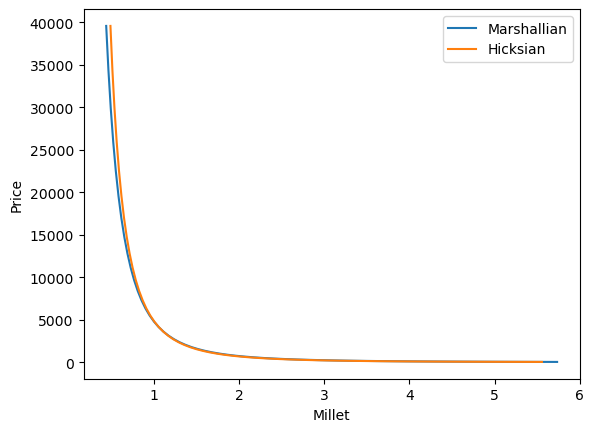

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

my_j = 'Millet'  # Interesting Ugandan staple

P = np.geomspace(.01,10,50)*pbar_uga[my_j]

# Utility of median household, given prices
U0 = result_uganda.indirect_utility(xref_uga,pbar_uga)

plt.plot([result_uganda.demands(xref_uga,my_prices(p0,j=my_j))[my_j] for p0 in P],P)
plt.plot([result_uganda.demands(U0,my_prices(p0,j=my_j),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"))

In [29]:

# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("data/tanzania/tanzania_fct.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# We use the same RDI for comparisons.
rdi_tanzania = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/new.csv'

## [Deliverable 1.6[A] - Construct Nutrient System](#construct-nutrient-system)

## [Deliverable 1.7[A] - Nutritional Challenges and Policy Goal](#nutritional-challenges-and-policy-goal)

## [Deliverable 1.8[B] - Policy Options](#policy-options)

## [Deliverable 1.9[C] - Policy Cost](#policy-cost)

## [Deliverable 1.10[C] - Value of Technical Innovation](#value-of-technical-innovation)

## [Deliverable 1.12[A] - Replication and Discussion](#replication-and-discussion)

## [Works Cited](#works-cited)
